<a href="https://colab.research.google.com/github/Urvashi2311/Digital_Image_Processing/blob/main/s22024_hw0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import os
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import HTML
import matplotlib.animation as animation

# Problem 1: Gray Images

In [28]:
path1 = r'/content/drive/MyDrive/misc/5.3.01.tiff' #Add Image Path for Question 1

### *1. Read the contents of an image into an array I. Use matplotlib to read and display images. Display the image I.*

In [29]:
def read_img(imgname):
  #Read image using matplotlib
  img = mpimg.imread(imgname)
  print("Pixel Array of image: ",img)
  print(" Array Shape of image: ",img.shape)
  return img

def display_img(img,cm):
  #Display image using matplotlib
  plt.imshow(img, cmap=cm)
  plt.axis(False)
  plt.show()

In [30]:
im = read_img(path1) #Calling Function for reading image

Pixel Array of image:  [[130 138 140 ... 115 113 111]
 [139 134 131 ... 110 117 116]
 [141 127 131 ... 109 108 107]
 ...
 [102 103 103 ...  76  80  89]
 [106 102 109 ...  72  69  82]
 [ 98 105 116 ...  85  81  89]]
 Array Shape of image:  (1024, 1024)


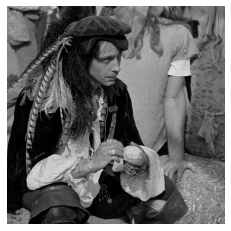

In [31]:
display_img(im,"gray") #Calling Function for displaying image

### *2. Print the maximum and minimum pixel values of I. Based on these values, how any bits are needed (used) per pixel? What is the resolution of I?*

In [32]:
def resol(img):   
  mx =int(max(img.flatten())) #maximum pixel value
  mn = min(img.flatten()) #minimum pixel value 
  b=mx.bit_length()
  w=img.shape[0]
  h=img.shape[1]
  return mn,mx,b,w,h

In [33]:
mx,mn,b,w,h=resol(im) #Calling Function for finding resolution of image
print("Maximum Pixel Value : ",mx)
print("Minimum Pixel Value : ",mn)
print("Bits Required : ",b)
print("Resolution: ",w,"X",h) 

Maximum Pixel Value :  0
Minimum Pixel Value :  255
Bits Required :  8
Resolution:  1024 X 1024


### *3. What is the size of the compressed image you downloaded? Print your answer. Based on the previous answers and assuming 256 gray levels, how efficienctly (compressed image size versus 8 bits per pixel size) is the image compressed for storage?*

In [34]:
def compression_ratio(imgname): 
  img = cv2.imread(imgname)
  width,height,channels = img.shape
  c_size = (os.stat(imgname).st_size)
  print("Size of compressed image: ",c_size)
  u_size = img.shape[0]*img.shape[1]
  print("Size of uncompressed image: ",u_size)
  compression_ratio  = (u_size/c_size)
  print("Compression Ratio: ",compression_ratio)
  

In [35]:
compression_ratio(path1)

Size of compressed image:  1048710
Size of uncompressed image:  1048576
Compression Ratio:  0.9998722239704018


### *4. Write a function that accepts as input an image I and a bitplane index i.e., a number b such that 0 ≤ b ≤ B − 1. The function must display the bitplane b of the image I as a binary image. Use the convention that b = 0 corresponds to the least significant bitplane and b = B − 1 corresponds to the most significant bitplane.*

In [36]:
def bit_plane_img(img_file,b):
  img = cv2.imread(img_file,0)
  bt1 = int(math.log2(img.shape[0]))
  bt2=bt1-b-1
  lst =[]
  for i in range(img.shape[0]):
    for j in range(img.shape[1]):
      lst.append(np.binary_repr(img[i][j],width=bt1))  
  b_bit_img = (np.array([int(i[int(bt2)]) for i in lst],dtype=np.uint8)*pow(2, b)).reshape(img.shape[0],img.shape[1])  
  display_img(b_bit_img,"gray")
  print("Bit Plane Image of ",b,"bit")
  


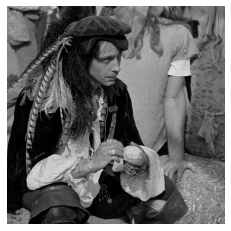

Orignal Image


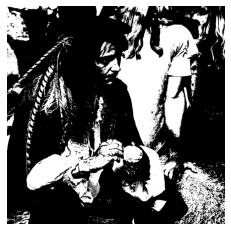

Bit Plane Image of  7 bit


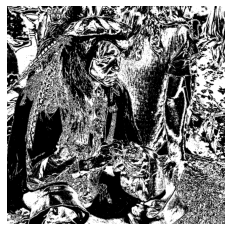

Bit Plane Image of  5 bit


In [37]:
display_img(im,"gray")
print("Orignal Image")
bit_plane_img(path1,7)
bit_plane_img(path1,5)

### *5. Write a function, which takes an 8-bit image and , the number of bits (B) to which the image needs to be quantized to and returns the B-bit quantized image. Display results for the image for 8,4,2,1 bits.*

In [38]:
def quantize(img,B):
  L=pow(2,B)
  t=np.zeros(L)
  r=np.zeros(L)  
  img_new = img.copy()
  
  I_min,I_max,b,w,h = resol(img)
  t[0]=I_min
  t[L-1]=I_max
  q=(t[L-1]-t[0])/L
  
  for i in range(1,L):
      t[i]=t[i-1]+q
      r[i]=t[i-1]+q/2
  
  for i in range(w):
    for j in range(h):
      pixel = img[i][j]
      for k in range(L-1):
        if (t[k]<pixel).any() and (pixel>t[k+1]).any():
          img_new[i][j]=r[k]
  return img_new
  

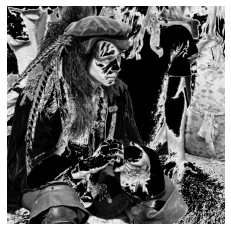

In [39]:
img_q=quantize(im,1)
display_img(img_q,'gray')

# Problem 2: RGB Image

In [40]:
path2 = r'/content/drive/MyDrive/Images_HWS/fg1.jpg' #Add Image Path for Question 2
fg = r'/content/drive/MyDrive/Images_HWS/fg1.jpg' #Add Foreground Image Path for Question 2
bg = r'/content/drive/MyDrive/Images_HWS/bg.jpg' #Add Background Image Path for Question 2
img_rgb =img = cv2.imread(path2)

### *1. Write a function to read RGB image and display each channel seperately and convert RGB image to a grayscale image.*

In [41]:
def read_RGB_img(img):    
  red_channel = img[:, :, 2]
  green_channel = img[:, :, 1]
  blue_channel = img[:, :, 0]
  display_img(red_channel,'Reds')
  display_img(red_channel,'Greens')
  display_img(red_channel,'Blues')
  cv2_imshow(img)
  return img
  

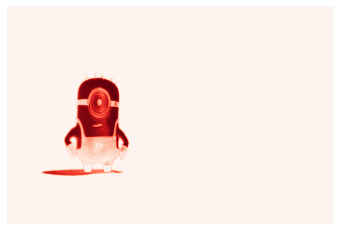

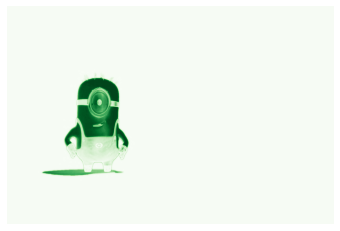

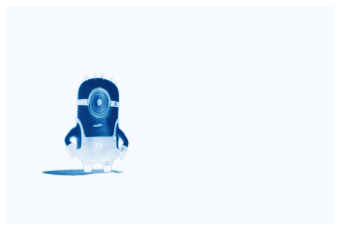

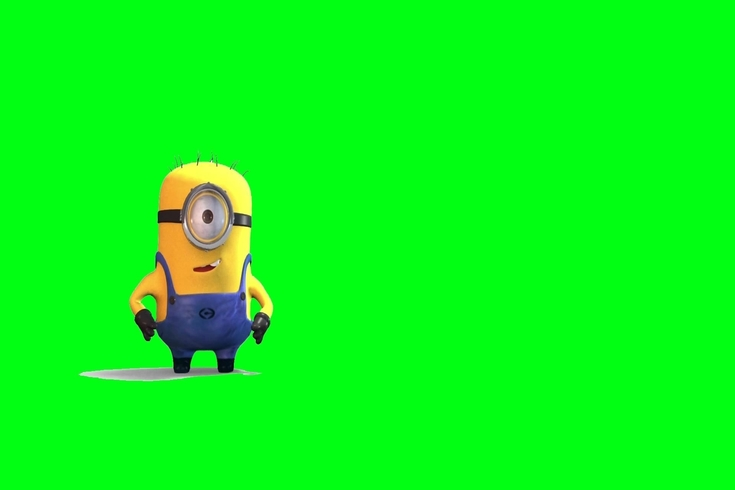

In [42]:
img_rgb=read_RGB_img(img_rgb)

In [43]:
def rgb2gray(img):
    gray_img = np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])    
    return gray_img

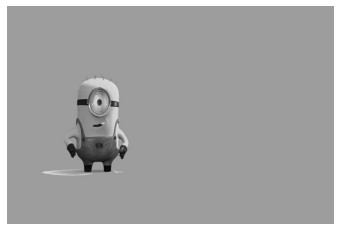

In [44]:
gray_img = rgb2gray(img_rgb)
display_img(gray_img,'gray')

### *2. Write a function that takes a color image and finds the most frequently occurring color from the image.*

In [45]:
def freq_color(img): 
  u, c = np.unique(img, axis=0, return_counts=True)  
  fc=u[c == c.max()][0][0]
  return fc
  

In [46]:
fc = freq_color(img_rgb)
print("Most Frequent color: ",fc)

Most Frequent color:  [ 19 255   1]


### *3. Write a function, which takes two images foreground and background that extracts the foreground object and places it in the background and returns the resultant image.*

In [47]:
def change_bkg(fg,bg):
  fg_img = cv2.imread(fg)
  bg_img = cv2.imread(bg)
  bg_color = freq_color(fg_img)
  width,height,channels = fg_img.shape
  
  for i in range(width):
    for j in range(height):
      comparison = fg_img[i][j] == bg_color
      equal_arrays = comparison.all()
      if equal_arrays:
        fg_img[i][j]=bg_img[i][j]
 
    
  cv2_imshow(fg_img) 

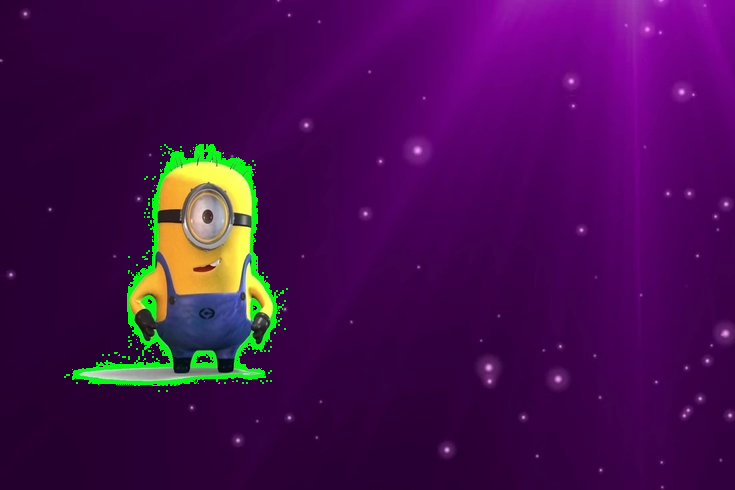

In [48]:
change_bkg(fg,bg)

# Problem 3: Digital Video

### *1.Write a function to read the Mp4 video using python and extract the frames from the video.*

In [49]:
!pip install imageio==2.4.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [50]:
import imageio
v_path = r'/content/drive/MyDrive/Videos/video.mp4' #Add Video Path for Question 3

In [51]:
def display_video(video):
    fig = plt.figure(figsize=(10,10))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i], animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime


### *1. Write a function to read the Mp4 video using python and extract the frames from the video.*

In [52]:
def read_vdo(vdo):
  video = cv2.VideoCapture(vdo)
  while(video.isOpened()):
    ret, frame = video.read() 
    if ret:
      print(frame)
    else:
        break
  pass

In [53]:
video = imageio.mimread(v_path)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

### *2. Quantize the extracted frames with desired number of bits (B-Given by user) and convert the images back to a video (MP4) and play the video.*

In [54]:
def quantize_vdo(vdo_pth,B):
  video = cv2.VideoCapture(vdo_pth)
  frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
  frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))
     
  size = (frame_width, frame_height)
  c=1
  save_path='/content/drive/MyDrive/Videos/quantize'+str(B)+'.mp4'
  result = cv2.VideoWriter(save_path,cv2.VideoWriter_fourcc(*'mp4v'),30, size)
  while(video.isOpened()):
      ret, frame = video.read()    
      
      if ret:
        red_frame = frame[:,:,2]
        green_frame = frame[:,:,1]
        blue_frame = frame[:,:,0]
        rf = quantize(red_frame,B)
        gf = quantize(green_frame,B)
        bf = quantize(blue_frame,B)
        gen=cv2.merge((bf,gf,rf))
        # cv2_imshow(gen)
        # print("Frame ",c)        
        result.write(gen)      
        cv2.waitKey(1)
        c=c+1
      else:
          break
  return save_path

In [56]:
quan_vdo=quantize_vdo(v_path,1)
video = imageio.mimread(quan_vdo)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
quan_vdo=quantize_vdo(v_path,2)
video = imageio.mimread(quan_vdo)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5

In [ ]:
quan_vdo=quantize_vdo(v_path,4)
video = imageio.mimread(quan_vdo)  #Loading video
HTML(display_video(video).to_html5_video())  #Inline video display in HTML5